In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from minisom import MiniSom
from lilypond.pond import Basin

In [2]:
RAND = 42
DATA_DIR = "./data/synthetic-2d-3-cluster"

In [3]:
X = pd.read_csv(f"{DATA_DIR}/X.csv", header=None, index_col=0)
X.columns = [0, 1]

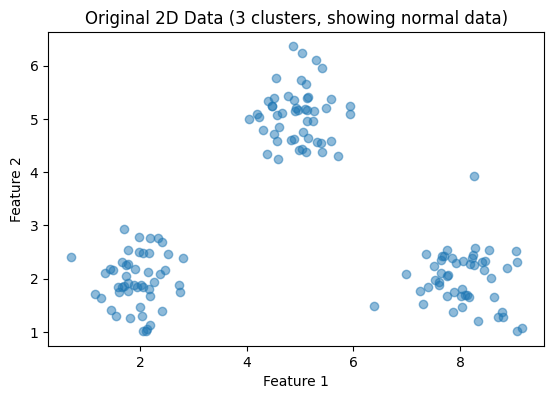

In [4]:
plt.figure()

plt.scatter(X.loc[:, 0], X.loc[:, 1], alpha=0.5)

plt.title("Original 2D Data (3 clusters, showing normal data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.gca().axes.set_aspect("equal")
plt.show()

In [5]:
# train SOM

data = X.to_numpy()

som = MiniSom(x=10, y=10, input_len=2, sigma=1.5, learning_rate=0.5, random_seed=RAND)
som.random_weights_init(data)
som.train(data, num_iteration=30, use_epochs=True, verbose=True)

print("")
print("Topographic error:", som.topographic_error(data))
print("Quantization error:", som.quantization_error(data).round(4))

 [ 4500 / 4500 ] 100% - 0:00:00 left 
 quantization error: 0.10274380609493336

Topographic error: 0.05333333333333334
Quantization error: 0.1027


Basin has been initialized.
Basin has been prepared.
Pond has been initialized.
Pads with less than 1 activations have been flooded.


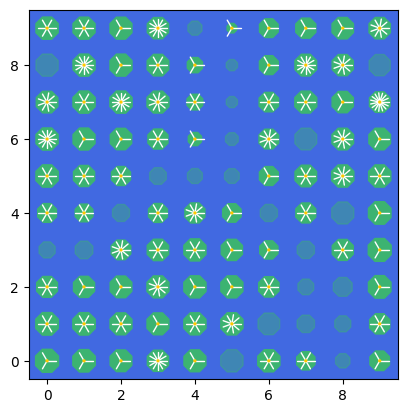

Pond is visualized.
Pond has been initialized.
Pads with less than 2 activations have been flooded.


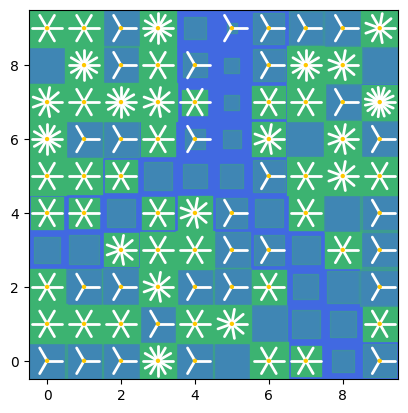

Pond is visualized.


In [7]:
# creating pond

basin = Basin(som, data, verb=True).prepare()

basin.pond() \
	.observe()

basin.pond() \
	.style_pad(gap=.1, marker="s") \
    .style_petal(gap=.1, width=2) \
    .flood(below_activations=2) \
    .observe()